In [214]:
from IPython.display import HTML
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

<img src='grocery_store_image1.jpg' width="700" height="300" align="center">

# Customer Purchasing Behavior

In [215]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')



**By: Pieter Leffers**

Starting Date: June 7, 2019

Completion Date: August 25, 2019

Last Updated: August 26, 2019



Project Description
---

During the course of our lives most of us one point or another have had to buy at least one product from Walmart. However, for the lucky few who haven't heard of Walmart; Walmart is the poster child for multi-national big-box retail store that stock and sell over 75 million different products, items ranging from paint to plushies, from guns to guacamole. With over 11,300 stores globally, employing 2.2 million people, and with 275 million weekly customers, Walmart is easily one of the largest franchises in the world. Walmart's fiscal revenue is something to the tune of $514 billion per year making it the most lucrative company in the world. With nearly every Walmart store selling grocery items and produce, what many may not have considered is that Walmart is also one of the world's largest U.S. grocery retailers.

https://en.wikipedia.org/wiki/Walmart

https://expandedramblings.com/index.php/walmart-statistics/


**Problem**: Customer purchasing optimization is a common problem for a lot of companies, both large and small. Luckily most large companies should have a wealth of data available to them in order to predict the possible purchasing behavior for many of
their clients so they can make informed decisions about stocking their shelves, providing customer recommendations on items, customer promotions, and predicting when a customer is losing interest in their service and planning to buy from a competitor. My proposal is to analyse and demonstrate some of these metrics on public data found on the internet as well as provide an algorithm that can help to predict future long-term purchasing in the form of Customer Lifetime Values.

**Client** : Walmart is looking to hire a Data Scientist to mine their data and analyze it to design tools for their grocery store customer purchasing data in order to provide promotions and offers to their individual customers and customers whom fall within the same demographic; thereby encouraging loyalty and consistent purchasing behavior from their regular customers.  



**Data** : Inspired by the paper, <U>Customer Shopping Pattern Prediction: A Recurrent Neural Network Approach</U> by Hojjat Salehinejad and Shahryar Rahnamayan, the authors used a Recurrent Neural Network to predict customer loyalty values (R,F,M) using the **Ta Feng Grocery Dataset**. After doing some internet searching I managed to find a copy or sample of the Ta Feng Grocery dataset hosted on Kaggle but not part of a competition.



**Approach** : I intend to do basic exploratory analysis, followed by clustering customers into demographic groups using K-means clustering, and analyzing some of those groups, provide a few metrics such as propensity, affinity, customer lifetime value (CLV), and possibly customer churn or attrition. Finally I plan on finishing the project
with trying to apply a Recurrent Neural Network to predict sales using Keras.


### The Ta Feng Grocery Dataset

The Ta Feng Dataset is a Supermarket Dataset containining 817741 transactions from November 2000 until the end of February 2001. The dataset contains information about 119578 shopping baskets, belonging to 32266 users, where 1129939 items were purchased from a range of 23812 products.

Column definition: Transaction date and time (no timestamp), Customer ID, Age Group, PIN Code, Product subclass, Product ID, Amount, Asset, Sales price


Fields of the Dataset are:
- Transaction date and time (time invalid and useless)
- Customer ID
- Age: 10 possible values
- Residence Area: 8 possible values
- Product subclass
- Product ID
- Amount
- Asset
- Sales price

https://www.kaggle.com/chiranjivdas09/ta-feng-grocery-dataset
https://stackoverflow.com/questions/25014904/download-link-for-ta-feng-grocery-dataset


Summary
-----

Difficulties:
    1. Non-linearity
    2. Seasonality

Import Packages

In [67]:
import pandas as pd
import numpy as np
import pickle
from datetime import date
import datetime as dt
import struct
import warnings
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

### Import and Prepare Data


In [2]:
#List of column names
col_names=['transaction_dt', 'customer_id', 'age_group', 'pin_code', 'product_subclass', 'product_id','amount','asset','sales_price']

November dataset

In [3]:
#Import data using ISO-8859-1 seems to work, seperation is semi-colon
November_2000=pd.read_csv('D11',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False) 
# the first row in the raw data that is garbage
November_2000=November_2000.drop(November_2000.index[0])
#modify dates column to datetime
November_2000['transaction_dt'] = pd.to_datetime(November_2000['transaction_dt'])
#remove empty spaces from values from the columns
November_2000['age_group'] = November_2000['age_group'].str.strip()
November_2000['pin_code'] = November_2000['pin_code'].str.strip()
November_2000['customer_id'] = November_2000['customer_id'].str.strip()
November_2000.head(3)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2000-11-01,00046855,D,E,110411,4710085120468,3,51,57
2,2000-11-01,00539166,E,E,130315,4714981010038,2,56,48
3,2000-11-01,00663373,F,E,110217,4710265847666,1,180,135


December dataset

In [4]:
December_2000=pd.read_csv('D12',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
December_2000=December_2000.drop(December_2000.index[0])
December_2000['transaction_dt'] = pd.to_datetime(December_2000['transaction_dt'])
December_2000['age_group'] = December_2000['age_group'].str.strip()
December_2000['pin_code'] = December_2000['pin_code'].str.strip()
December_2000['customer_id'] = December_2000['customer_id'].str.strip()
December_2000.head(3)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2000-12-01,00207423,C,E,530101,4710054134403,1,92,99
2,2000-12-01,00329002,F,E,590514,4710049000973,1,41,49
3,2000-12-01,01657951,E,E,120103,4710011401135,1,23,29


January dataset

In [5]:
January_2001=pd.read_csv('D01',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
January_2001=January_2001.drop(January_2001.index[0])
January_2001['transaction_dt'] = pd.to_datetime(January_2001['transaction_dt'])
January_2001['age_group'] = January_2001['age_group'].str.strip()
January_2001['pin_code'] = January_2001['pin_code'].str.strip()
January_2001['customer_id'] = January_2001['customer_id'].str.strip()
January_2001.head(3)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2001-01-01,00141833,F,F,130207,4710105011011,2,44,52
2,2001-01-01,01376753,E,E,110217,4710265849066,1,150,129
3,2001-01-01,01603071,E,G,100201,4712019100607,1,35,39


February dataset

In [6]:
February_2001=pd.read_csv('D02',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
February_2001=February_2001.drop(February_2001.index[0])
February_2001['transaction_dt'] = pd.to_datetime(February_2001['transaction_dt'])
February_2001['age_group'] = February_2001['age_group'].str.strip()
February_2001['pin_code'] = February_2001['pin_code'].str.strip()
February_2001['customer_id'] = February_2001['customer_id'].str.strip()
February_2001.head(3)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2001-02-01,00557818,H,E,500210,4710114105046,1,123,135
2,2001-02-01,01677683,C,B,711310,4902520163103,6,840,894
3,2001-02-01,01900910,A,D,500206,4710036003598,1,26,33


_______________________

### Combine the Datasets

In [173]:
#Create value labels for dataframe
#Age Grouping labels
age_dict_class = {'A':'<25', 'B':'25-29', 'C':'30-34', 'D':'35-39', 'E':'40-44', \
        'F':'45-49', 'G':'50-54', 'H':'55-59', 'I':'60-64', 'J':'+65', 'K':'NA'}

inv_age_dict_class = {v: k for k, v in age_dict_class.items()} #thank you stack overflow!

#Age Grouping labels into integer values
age_dict_int = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, \
        'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11}

inv_age_dict_int = {v: k for k, v in age_dict_int.items()} 

#pin code values into integers
pin_code_dict_int = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, \
        'F':6, 'G':7, 'H':8}

In [174]:
#Combine Datasets
total_set=November_2000.append(December_2000).append(January_2001).append(February_2001)
#Apply value labels for dataframe
total_set['age_label'] = total_set['age_group'].apply(lambda x: age_dict_class[x])
total_set['age_int'] = total_set['age_group'].apply(lambda x: age_dict_int[x])
total_set['pin_code_int'] = total_set['pin_code'].apply(lambda x: pin_code_dict_int[x])

In [175]:
total_set.head()

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price,age_label,age_int,pin_code_int
1,2000-11-01,00046855,D,E,110411,4710085120468,3,51,57,35-39,4,5
2,2000-11-01,00539166,E,E,130315,4714981010038,2,56,48,40-44,5,5
3,2000-11-01,00663373,F,E,110217,4710265847666,1,180,135,45-49,6,5
4,2000-11-01,00340625,A,E,110411,4710085120697,1,17,24,<25,1,5
5,2000-11-01,00236645,D,H,712901,8999002568972,2,128,170,35-39,4,8


Sort by Customer ID and Date

In [176]:
total_set=total_set.sort_values(by=['customer_id','transaction_dt'])
total_set=total_set.reset_index(drop=True)

In [177]:
total_set.head(5)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price,age_label,age_int,pin_code_int
0,2000-11-13,00001069,K,E,100314,4710176008699,1,78,98,NA,11,5
1,2000-11-13,00001069,K,E,100205,9556439880610,1,80,89,NA,11,5
2,2001-01-21,00001069,K,E,110333,4710320224661,1,361,425,NA,11,5
3,2001-01-21,00001069,K,E,100311,4710022101208,1,197,198,NA,11,5
4,2001-01-21,00001069,K,E,110333,4712603661644,1,313,348,NA,11,5


In [178]:
#total_set.customer_id.value_counts()

In [179]:
#Handy Function I use sometimes to one-hot encode. 
#Basically .dummies() works better in most cases
def create_dummies(df,column):
    '''
    Function to create one-hot encoding. 
          Not the most efficient but it works.
    '''
    temp=pd.DataFrame(df[column])
    for x in temp[column].unique():
        temp[str(column+'_')+x]=(temp[column]==x).astype(int)
    return temp

#Create dummy variables for age groupings
temp_age_group=create_dummies(total_set,'age_group')
comparison=sorted(temp_age_group.columns)
temp_age_group=temp_age_group[comparison]
#concatenate the previously created dataframe with the created dummies
temp_age_group=pd.concat([total_set, temp_age_group], axis=1)

In [180]:
#Same as above but creating dummies of pin code
temp_pin_code=create_dummies(temp_age_group,'pin_code')
comparison=sorted(temp_pin_code.columns)
temp_pin_code=temp_pin_code[comparison]

temp_pin_code=pd.concat([temp_age_group, temp_pin_code], axis=1)

In [181]:
total_set=temp_pin_code.drop(['age_group','pin_code'],axis=1)

In [182]:
total_set.head(3)

,transaction_dt,customer_id,product_subclass,product_id,amount,asset,sales_price,age_label,age_int,pin_code_int,...,age_group_J,age_group_K,pin_code_A,pin_code_B,pin_code_C,pin_code_D,pin_code_E,pin_code_F,pin_code_G,pin_code_H
0,2000-11-13,00001069,100314,4710176008699,1,78,98,NA,11,5,...,0,1,0,0,0,0,1,0,0,0
1,2000-11-13,00001069,100205,9556439880610,1,80,89,NA,11,5,...,0,1,0,0,0,0,1,0,0,0
2,2001-01-21,00001069,110333,4710320224661,1,361,425,NA,11,5,...,0,1,0,0,0,0,1,0,0,0


**Convert Columns to Integers **

*Note: keep in mind some are ordinal categories*

In [183]:
#convert variables to integers
#total_set['customer_id']=total_set.customer_id.astype(np.int64)
total_set['product_subclass']=total_set.product_subclass.astype(np.int64)
total_set['product_id']=total_set.product_id.astype(np.int64)
total_set['amount']=total_set.amount.astype(np.int64)
total_set['asset']=total_set.asset.astype(np.int64)
total_set['sales_price']=total_set.sales_price.astype(np.int64)

In [184]:
age_map=total_set.reset_index()
age_map=total_set[['customer_id','age_int']]
age_map=dict(zip(list(age_map.customer_id),list(age_map.age_int)))

In [185]:
pin_map=total_set.reset_index()
pin_map=total_set[['customer_id','pin_code_int']]
pin_map=dict(zip(list(pin_map.customer_id),list(pin_map.pin_code_int)))

In [186]:
total_set.head(3)

,transaction_dt,customer_id,product_subclass,product_id,amount,asset,sales_price,age_label,age_int,pin_code_int,...,age_group_J,age_group_K,pin_code_A,pin_code_B,pin_code_C,pin_code_D,pin_code_E,pin_code_F,pin_code_G,pin_code_H
0,2000-11-13,00001069,100314,4710176008699,1,78,98,NA,11,5,...,0,1,0,0,0,0,1,0,0,0
1,2000-11-13,00001069,100205,9556439880610,1,80,89,NA,11,5,...,0,1,0,0,0,0,1,0,0,0
2,2001-01-21,00001069,110333,4710320224661,1,361,425,NA,11,5,...,0,1,0,0,0,0,1,0,0,0


*Now all the variables we might use are integer type making it easier to work with for modeling or plotting* 

In [187]:
total_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 29 columns):
transaction_dt      817741 non-null datetime64[ns]
customer_id         817741 non-null object
product_subclass    817741 non-null int64
product_id          817741 non-null int64
amount              817741 non-null int64
asset               817741 non-null int64
sales_price         817741 non-null int64
age_label           817741 non-null object
age_int             817741 non-null int64
pin_code_int        817741 non-null int64
age_group_A         817741 non-null int32
age_group_B         817741 non-null int32
age_group_C         817741 non-null int32
age_group_D         817741 non-null int32
age_group_E         817741 non-null int32
age_group_F         817741 non-null int32
age_group_G         817741 non-null int32
age_group_H         817741 non-null int32
age_group_I         817741 non-null int32
age_group_J         817741 non-null int32
age_group_K         817741 non-null in

Minimize to just needed columns

In [188]:
minimized_set=total_set[['transaction_dt','customer_id','age_int','product_subclass','product_id','pin_code_int','asset','amount','sales_price']]
minimized_set=minimized_set.sort_values(by='transaction_dt',ascending=True)

In [189]:
minimized_set.head()

,transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price
753166,2000-11-01,02101750,3,130315,4714981010038,5,28,1,24
787527,2000-11-01,02144511,1,110401,4710088410382,5,44,1,55
787526,2000-11-01,02144511,1,100312,37000445111,5,38,1,47
787525,2000-11-01,02144511,1,100205,4711372660094,5,58,1,76
787524,2000-11-01,02144511,1,110401,4710008290032,5,46,1,57


***For the most part the data has been fairly clean, I've had to remove white spaces, convert to datetime format, and modify the columns to be integers for data analysis and modeling. I have also created label dictionaries so I can easily map the labels to the values back and forth. Since I don't know the format or what the correct values are supposed to be it is probably wise to leave the values as they are unless there are wildly inconsistent with the rest of the data (outliers).***

______________________________________________

Exploratory Data Analysis
------

**Transaction Dates**

We know from the description what the time periods are; however in this particular case I'm interested in seeing the count of transactions by weeks, partially to confirm the dates are correct and to possibly identify time periods that have the most activity between the two years. Note: we expect that the years are different from each other and that seasonality would have a strong effect on purchasing behavior patters.

In [190]:
#helper function for calculating the number of months from the first transaction
def get_date_int(df,column):
    '''
    Returns year,month,week, and day units.
    '''
    year=df[column].dt.year
    month=df[column].dt.month
    week=df[column].dt.week
    day=df[column].dt.day
    return year,month,week,day

In [191]:
minimized_set['year'],minimized_set['month'],minimized_set['week'],minimized_set['day']=get_date_int(minimized_set,'transaction_dt')

In [192]:
wk_set=minimized_set[['year','week','amount']]
wk_set=wk_set.groupby(['year','week']).count()
wk_set=wk_set.reset_index()
wk_set_2000=wk_set[wk_set['year']==2000][['week','amount']]
wk_set_2001=wk_set[wk_set['year']==2001][['week','amount']]

Text(0.5,1,'Weekly Transactions in the Year 2000')

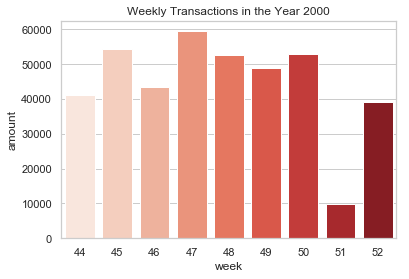

In [193]:
sns.barplot(x="week", y="amount", data=wk_set_2000, palette='Reds').set_title('Weekly Transactions in the Year 2000')

Text(0.5,1,'Weekly Transactions in the Year 2001')

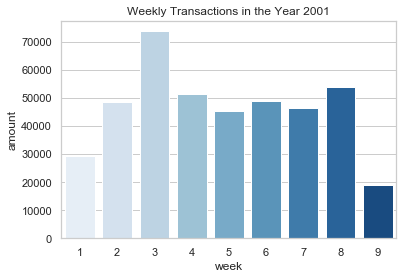

In [194]:
sns.barplot(x="week", y="amount", data=wk_set_2001, palette='Blues').set_title('Weekly Transactions in the Year 2001')

**Explanation:**

We see that there is a great deal of activity in the weeks leading up to the holiday season and then tapering off after several weeks after the holiday season. I would expect the last few weeks of the dataset to reflect more normal purchasing activity compared the rest of the dataset.

**Customer IDs**

We can see there are over 32200 seperate Customer Id's in the dataset with some having over 1,000 transactions to the grocery store within a 4 month period of time. That is a pretty big number for such a short period of time!

In [195]:
minimized_set.customer_id.value_counts().describe()

count    32266.000000
mean        25.343736
std         34.717992
min          1.000000
25%          6.000000
50%         14.000000
75%         32.000000
max       1246.000000
Name: customer_id, dtype: float64

**Customer 00020459**

*Magnifying the customer with the most transactions the data appear to be valid transactions, in that, I don't see anything about the data that would strike me as duplicates or anything like that. They are clearly seperate items, some with quite a few amounts on seperate occasions. *

In [196]:
cust_00020459=minimized_set[minimized_set['customer_id']=='00020459']
cust_00020459.head()

,transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price,year,month,week,day
1522,2000-11-02,00020459,5,320203,4715398106864,4,70,2,78,2000,11,44,2
1523,2000-11-02,00020459,5,110401,4710088410610,4,19,1,26,2000,11,44,2
1524,2000-11-02,00020459,5,100312,4710543214012,4,14,1,18,2000,11,44,2
1525,2000-11-02,00020459,5,110136,4710088410207,4,44,1,55,2000,11,44,2
1526,2000-11-02,00020459,5,130204,4710105015125,4,94,1,106,2000,11,44,2


In [197]:
cust_00020459['amount'].value_counts()

1     1017
2      167
3       34
4       13
6        8
5        4
12       1
8        1
7        1
Name: amount, dtype: int64

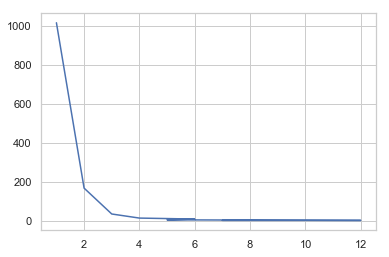

In [198]:
cust_00020459=minimized_set[minimized_set['customer_id']=='00020459'] 
plt.plot(cust_00020459['amount'].value_counts())

**Explanation:** Without having a more intimate knowledge of the data the Customer Id's look fine. There are definitely some outliers in terms of transactions. I suspect there is some kind of clerical error happening here since aside from the actual ID everything else about the transactions look normal.

**Age Groups**

In [199]:
minimized_set.age_int.describe()

count    817741.000000
mean          4.817952
std           2.252038
min           1.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          11.000000
Name: age_int, dtype: float64

In [200]:
age_grps=pd.DataFrame(minimized_set.age_int.value_counts()).reset_index()
age_grps.columns=['Age_Class','Counts']

age_grps['Age_Class']=age_grps['Age_Class'].map(inv_age_dict_int)
age_grps['Age_Class']=age_grps['Age_Class'].map(age_dict_class)
age_grps

,Age_Class,Counts
0,35-39,181213
1,40-44,151023
2,30-34,140805
3,45-49,99719
4,25-29,66432
5,50-54,53719
6,<25,30070
7,+65,27353
8,55-59,24743
9,NA,22362


Text(0.5,1,'Age Ranges for Customers')

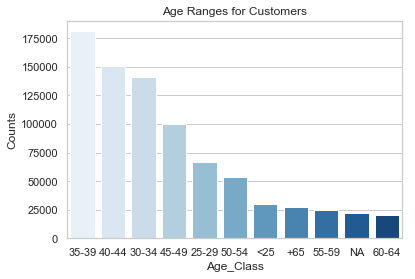

In [218]:
sns.barplot(x="Age_Class", y="Counts", data=age_grps, palette='Blues').set_title('Age Ranges for Customers')

**Explanation:** We can see the bulk of the shoppers come from the age ranges of 35 to 44, this would seem consistent for a grocery store if you are a young adult shopper and need to buy sustenance for your broodlings. Presumably older adults only need to buy for themselves.

**Product Subclass**

There's not much information that can be provided about product_subclass without knowing how the products are coded. I can't really plot them since there are over 2000 seperate classes. There don't appear to be any missing values. 

In [225]:
print('Unique product subclasses:',len(minimized_set.product_subclass.unique()))

Unique product subclasses: 2012


In [224]:
minimized_set.product_subclass.describe()

count    817741.000000
mean     284950.495933
std      226390.701451
min      100101.000000
25%      110106.000000
50%      130106.000000
75%      520314.000000
max      780510.000000
Name: product_subclass, dtype: float64

**Product ID**

Again there isn't much that can be said about the product ids without a coding scheme to reference. There are over 23,000 different items and again there don't appear to be any missing values.

In [232]:
print('Unique product IDs:',len(minimized_set.product_id.unique()))

Unique product IDs: 23812


In [233]:
minimized_set.product_id.describe()

count    8.177410e+05
mean     4.461639e+12
std      1.690093e+12
min      2.000882e+07
25%      4.710085e+12
50%      4.710421e+12
75%      4.712500e+12
max      9.789580e+12
Name: product_id, dtype: float64

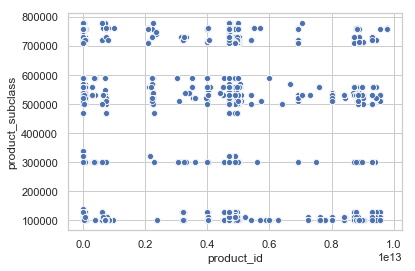

In [250]:
products=minimized_set[['product_subclass','product_id']]
sns.scatterplot(x="product_id", y="product_subclass", data=products)

**Explanation:** We can see there are definately distinct groupings of products for each subclass. We can also see that the bulk of products seem to be clustered around the mean and extremes of subclasses. If I knew more information about the subclass groupings it would probably make sense to further bin these groups to into a smaller group of categories, say 20 seperate categories.

**Pin Code**

We can see the lion's share of transactions happen within regions 5 and 6.

Text(0.5,1,'Regions for Customers')

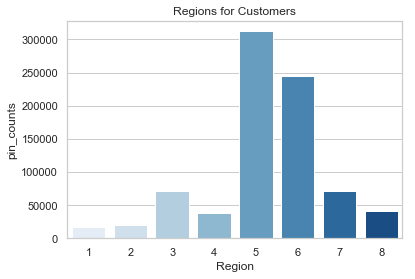

In [259]:
pin_grps=pd.DataFrame(minimized_set.pin_code_int.value_counts()).reset_index()
pin_grps.columns=['Region','pin_counts']
sns.barplot(x="Region", y="pin_counts", data=pin_grps, palette='Blues').set_title('Regions for Customers')

**Amount Purchased**

This is a plot showing the number of purchases down the rows of the dataset (by transaction). Since the data is organized by transaction date we can see that certain dates/days received dramatically more purchases than other days. Since our data includes holiday seasons of 2000 and 2001 we should expect to see increases in activity; however it would seem we do have some exceptional circumstances for purchasing. By and large we can see that typically there is on average a single purchase per transaction, give or take a purchase or two (*std*).

In [ ]:
total_set.amount.describe()

In [ ]:
plt.plot(total_set.amount)
plt.title('Transaction Amounts')
plt.ylabel('amount per transaction')
plt.xlabel('location in rows of dataset')

In [ ]:
def boxPlot(variable):
    sns.set_style("whitegrid")
    #sns.load_dataset("tips")
    sns.boxplot(x=variable)
    return plt.show(),plt.clf()

In [ ]:
boxPlot(total_set['amount'])

# Metrics


## Acquisition Cohorts


### Time Cohorts
-----

Identify cohorts based on first purchase month.

In [207]:
#truncates date object to first day of the month
def get_month(x): 
    return dt.datetime(x.year,x.month,1)

In [208]:
#month of first purchase
minimized_set['transaction_mo']=minimized_set['transaction_dt'].apply(get_month)

In [209]:
grouping=minimized_set['transaction_dt'].apply(get_month)
grouping=minimized_set.groupby('customer_id')['transaction_mo']

In [210]:
#assign smallest invoice month value to each customer
minimized_set['cohort_mo']=grouping.transform('min')

In [211]:
minimized_set[['cohort_mo','transaction_mo']].head(5)

,cohort_mo,transaction_mo
753166,2000-11-01,2000-11-01
787527,2000-11-01,2000-11-01
787526,2000-11-01,2000-11-01
787525,2000-11-01,2000-11-01
787524,2000-11-01,2000-11-01


Calculate time offset

In [212]:
#helper function for calculating the number of months from the first transaction
def get_date_int(df,column):
    '''
    Returns year,month,week, and day units.
    '''
    year=df[column].dt.year
    month=df[column].dt.month
    week=df[column].dt.week
    day=df[column].dt.day
    return year,month,week,day

Assign time offset value

In [213]:
#From the function above return the purchase year,month, week, and day
invoice_year,invoice_month,invoice_week,day=get_date_int(minimized_set,'transaction_mo')
#Same as previous line above but do it for those who purchased in the same month
cohort_year,cohort_month,cohort_week,day=get_date_int(minimized_set,'cohort_mo')

In [214]:
#Subtracting group cohort from the actual time of purchase
years_diff=invoice_year-cohort_year
months_diff=invoice_month-cohort_month
week_diff=invoice_week-cohort_week

Identify transaction cohorts

In [215]:
minimized_set['cohort_index']=years_diff*12+months_diff+1 #convert year to months by multiplying difference
minimized_set.head()

,transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price,year,month,week,day,transaction_mo,cohort_mo,cohort_index
753166,2000-11-01,02101750,3,130315,4714981010038,5,28,1,24,2000,11,44,1,2000-11-01,2000-11-01,1
787527,2000-11-01,02144511,1,110401,4710088410382,5,44,1,55,2000,11,44,1,2000-11-01,2000-11-01,1
787526,2000-11-01,02144511,1,100312,37000445111,5,38,1,47,2000,11,44,1,2000-11-01,2000-11-01,1
787525,2000-11-01,02144511,1,100205,4711372660094,5,58,1,76,2000,11,44,1,2000-11-01,2000-11-01,1
787524,2000-11-01,02144511,1,110401,4710008290032,5,46,1,57,2000,11,44,1,2000-11-01,2000-11-01,1


Count monthly active customers from each cohort

In [216]:
grouping=minimized_set.groupby(['cohort_mo','cohort_index'])
cohort_data=grouping['customer_id'].apply(pd.Series.nunique)#count number of customer in each group
cohort_data=cohort_data.reset_index()
cohort_counts=cohort_data.pivot(index='cohort_mo',columns='cohort_index',values='customer_id')

In [137]:
cohort_counts

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,16760.0,8618.0,9034.0,9226.0
2000-12-01,6829.0,2523.0,2514.0,NaN
2001-01-01,5021.0,1515.0,NaN,NaN
2001-02-01,3656.0,NaN,NaN,NaN


Cohort Metrics
----

**Customer Retention Rate**

*How many customers returned*

In [138]:
#Store the first column as cohort_sizes 
cohort_sizes=cohort_counts.iloc[:,0]

In [139]:
#Divide all values in the cohort_counts table by cohort_sizes
retention=cohort_counts.divide(cohort_sizes,axis=0)

**Retention Table**


In [140]:
#Review the retention table (first column is expected to have 100% retention rate)
retention.round(3)*100

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,100.0,51.4,53.9,55.0
2000-12-01,100.0,36.9,36.8,NaN
2001-01-01,100.0,30.2,NaN,NaN
2001-02-01,100.0,NaN,NaN,NaN


**Average Quantity for Each Cohort**


In [141]:
grouping=minimized_set.groupby(['cohort_mo','cohort_index'])
cohort_data=grouping['amount'].mean()#average quantity
cohort_data=cohort_data.reset_index()
average_quantity=cohort_data.pivot(index='cohort_mo',columns='cohort_index',values='amount')
average_quantity.round(1)

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,1.4,1.4,1.3,1.4
2000-12-01,1.4,1.4,1.4,NaN
2001-01-01,1.3,1.4,NaN,NaN
2001-02-01,1.4,NaN,NaN,NaN


**Average Price for Each Cohort**

In [142]:
grouping=minimized_set.groupby(['cohort_mo','cohort_index'])
cohort_data=grouping['sales_price'].mean()#average quantity
cohort_data=cohort_data.reset_index()
average_quantity=cohort_data.pivot(index='cohort_mo',columns='cohort_index',values='sales_price')
average_quantity.round(1)

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,129.7,129.7,140.5,123.2
2000-12-01,132.5,139.6,120.5,NaN
2001-01-01,145.2,128.8,NaN,NaN
2001-02-01,132.6,NaN,NaN,NaN


Visualizing cohort analysis
---------

In [143]:
retention.round(3)*100

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,100.0,51.4,53.9,55.0
2000-12-01,100.0,36.9,36.8,NaN
2001-01-01,100.0,30.2,NaN,NaN
2001-02-01,100.0,NaN,NaN,NaN


In [144]:
retention.index=pd.Series([x.date() for x in retention.index])

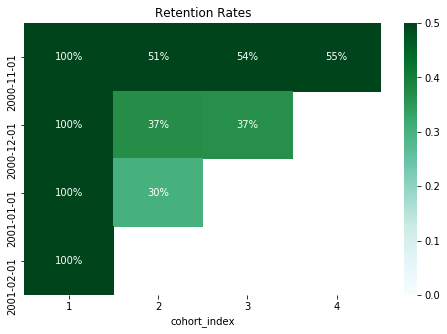

In [145]:
plt.figure(figsize=(8,5))
plt.title('Retention Rates')
sns.heatmap(data=retention,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuGn')
plt.show()

**Visualize average quantity metric**

In [146]:
average_quantity.index=pd.Series([x.date() for x in average_quantity.index])

In [147]:
average_quantity.round(2)

cohort_index,1,2,3,4
2000-11-01,129.73,129.72,140.5,123.18
2000-12-01,132.53,139.59,120.5,NaN
2001-01-01,145.19,128.85,NaN,NaN
2001-02-01,132.60,NaN,NaN,NaN


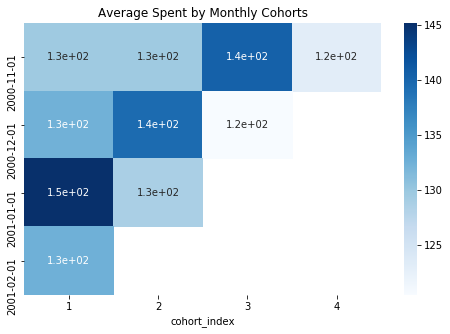

In [148]:
plt.figure(figsize=(8,5))
plt.title('Average Spent by Monthly Cohorts')
sns.heatmap(data=average_quantity,annot=True,cmap='Blues')
plt.show()

___________________

Recency, Frequency, Monetary (RFM) Segmentation
=====================

**Grouping RFM values**

Behavioral customer segmentation based on three metrics:
    1. Recency (R)
        - How was each customer's last purchase
    2. Frequency (F)
        - How many purchases the customer has done 
    3. Monetary Value (M)
        - Measures how much the customer has spent 

In [46]:
#Preprocess data
rmf_minimized_set=minimized_set[['product_id','amount','transaction_dt','sales_price','customer_id']]

In [47]:
#Preprocess data
rmf_minimized_set['total_sum']=rmf_minimized_set['sales_price']*minimized_set['amount']

In [48]:
print('min: {}, max: {} '.format(min(rmf_minimized_set.transaction_dt),max(rmf_minimized_set.transaction_dt)))

min: 2000-11-01 00:00:00, max: 2001-02-28 00:00:00 


In [49]:
snapshot_date=max(rmf_minimized_set.transaction_dt)+dt.timedelta(days=1)
snapshot_date

Timestamp('2001-03-01 00:00:00')

RFM for values 

In [50]:
#Aggregate data on a customer level 
rmf_dataframe=rmf_minimized_set.groupby(['customer_id']).agg({
    'transaction_dt':lambda x: (snapshot_date-x.max()).days,
    'product_id':'count','total_sum':'sum'})

#Rename columns for easier interpretation
rmf_dataframe.rename(columns={'transaction_dt':'Recency',
                         'product_id':'Frequency',
                         'total_sum':'MonetaryValue'},inplace=True)

rmf_dataframe.head()

,Recency,Frequency,MonetaryValue
customer_id,,,
00001069,19,11,2660
00001113,54,18,3209
00001250,19,14,1795
00001359,87,3,602
00001823,36,14,6053


**Building RFM Segment Quartiles Using Chosen Thresholds**

In [51]:
r_labels=range(4,0,-1) 
#higher labels higher values
f_labels=range(1,5)
m_labels=range(1,5)

r_quartiles=pd.qcut(rmf_dataframe['Recency'],4,labels=r_labels)
f_quartiles=pd.qcut(rmf_dataframe['Frequency'],4,labels=f_labels)
m_quartiles=pd.qcut(rmf_dataframe['MonetaryValue'],4,labels=f_labels)

rmf_dataframe=rmf_dataframe.assign(R=r_quartiles.values)
rmf_dataframe=rmf_dataframe.assign(F=f_quartiles.values)
rmf_dataframe=rmf_dataframe.assign(M=m_quartiles.values)
rmf_dataframe.head()

,Recency,Frequency,MonetaryValue,R,F,M
customer_id,,,,,,
00001069,19,11,2660,3,2,2
00001113,54,18,3209,2,3,3
00001250,19,14,1795,3,2,2
00001359,87,3,602,1,1,1
00001823,36,14,6053,2,2,3


Build RFM Segment and RFM Score

*RFM Score= Relative Customer Value*

In [52]:
def join_rfm(x): return str(x['R'])+str(x['F'])+str(x['M'])
rmf_dataframe['RFM_Segment']=rmf_dataframe.apply(join_rfm,axis=1)
rmf_dataframe['RFM_Score']=rmf_dataframe[['R','F','M']].sum(axis=1)

In [53]:
rmf_dataframe.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
00001069,19,11,2660,3,2,2,322,7.0
00001113,54,18,3209,2,3,3,233,8.0
00001250,19,14,1795,3,2,2,322,7.0
00001359,87,3,602,1,1,1,111,3.0
00001823,36,14,6053,2,2,3,223,7.0


### Analyzing RFM table

In [54]:
gb_rmf_dataframe=rmf_dataframe.groupby('RFM_Segment').size().sort_values(ascending=False)

Filtering on RFM segments


In [55]:
gb_rmf_dataframe[:10]

RFM_Segment
444    2819
111    2638
344    1663
211    1493
122    1130
333    1117
222    1040
433    1004
233     959
311     923
dtype: int64

In [56]:
#gb_rmf_dataframe[gb_rmf_dataframe==111][:5]

Summary Metrics per RFM Score


In [57]:
rmf_dataframe.groupby('RFM_Score').agg({'Recency':'mean',
    'Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0          90.4       3.1         379.9  2638
4.0          64.6       4.9         739.1  2898
5.0          55.5       6.9        1354.4  3312
6.0          43.4       9.2        2833.9  3960
7.0          39.1      13.5       20457.6  3492
8.0          30.6      18.3        9064.2  3541
9.0          23.2      24.9       23789.4  3374
10.0         18.2      37.0       20721.6  3214
11.0         10.9      55.9      138200.3  3018
12.0          4.1      89.5       44694.4  2819

*Use RFM score to group customers into Gold,Silver,and Bronze segments for easier interpretation.*

In [58]:
def segment_me(df):
    if df['RFM_Score']>=9:
        return 'Gold'
    elif (df['RFM_Score']>=5) and (df['RFM_Score']<9):
        return 'Silver'
    else:
        return 'Bronze'

In [59]:
rmf_dataframe['General_Segment']=rmf_dataframe.apply(segment_me,axis=1)

In [60]:
rmf_dataframe.head(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
customer_id,,,,,,,,,
00001069,19,11,2660,3,2,2,322,7.0,Silver
00001113,54,18,3209,2,3,3,233,8.0,Silver
00001250,19,14,1795,3,2,2,322,7.0,Silver
00001359,87,3,602,1,1,1,111,3.0,Bronze
00001823,36,14,6053,2,2,3,223,7.0,Silver


In [61]:
rmf_dataframe.groupby('General_Segment').agg({'Recency':'mean',
    'Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue       
                   mean      mean          mean  count
General_Segment                                       
Bronze             76.9       4.0         568.0   5536
Gold               14.6      50.2       55528.9  12425
Silver             42.0      12.0        8335.7  14305

## Segmentation Solution Using K-means

In [62]:
rmf_minimized_set=minimized_set[['product_id','amount','transaction_dt','sales_price','customer_id']]
rmf_minimized_set['total_sum']=rmf_minimized_set['sales_price']*minimized_set['amount']
sorted_minimized_set=minimized_set.sort_values(by=['customer_id','transaction_dt']).head(15)
sorted_minimized_set

,transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price,transaction_mo,cohort_mo,cohort_index
0,2000-11-13,00001069,11,100314,4710176008699,5,78,1,98,2000-11-01,2000-11-01,1
1,2000-11-13,00001069,11,100205,9556439880610,5,80,1,89,2000-11-01,2000-11-01,1
2,2001-01-21,00001069,11,110333,4710320224661,5,361,1,425,2001-01-01,2000-11-01,3
3,2001-01-21,00001069,11,100311,4710022101208,5,197,1,198,2001-01-01,2000-11-01,3
4,2001-01-21,00001069,11,110333,4712603661644,5,313,1,348,2001-01-01,2000-11-01,3
5,2001-02-03,00001069,11,100101,22000167620,5,216,2,192,2001-02-01,2000-11-01,4
6,2001-02-03,00001069,11,120106,4710011402026,5,44,2,46,2001-02-01,2000-11-01,4
7,2001-02-03,00001069,11,110117,4903101125107,5,108,2,58,2001-02-01,2000-11-01,4
8,2001-02-03,00001069,11,110108,4710088620156,5,154,2,130,2001-02-01,2000-11-01,4
9,2001-02-03,00001069,11,100314,4710176008699,5,78,1,70,2001-02-01,2000-11-01,4


In [63]:
snapshot_date=max(rmf_minimized_set.transaction_dt)+dt.timedelta(days=1)
snapshot_date

Timestamp('2001-03-01 00:00:00')

Adding Tenure

In [64]:
dataframe_rfmt=rmf_minimized_set
dataframe_rfmt['transaction_dt_temp']=dataframe_rfmt['transaction_dt']

#Aggregate data on a customer level 
dataframe_rfmt=rmf_minimized_set.groupby(['customer_id']).agg({
    'transaction_dt':lambda x: (snapshot_date-x.max()).days,
    'product_id':'count',
    'total_sum':'sum',
    'transaction_dt_temp':lambda x: (x.max()-x.min()).days})

In [65]:
#Rename columns for easier interpretation
dataframe_rfmt.rename(columns={'transaction_dt':'Recency',
                         'product_id':'Frequency',
                         'total_sum':'MonetaryValue',
                        'transaction_dt_temp':'Tenure'},inplace=True)

dataframe_rfmt['Tenure']=dataframe_rfmt['Tenure']+1

Pre-process data

In [65]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
dataframe_rfmt_log = np.log(dataframe_rfmt)

In [66]:
dataframe_rfmt_log.head()

,Recency,Frequency,MonetaryValue,Tenure
customer_id,,,,
00001069,2.944439,2.397895,7.886081,4.499810
00001113,3.988984,2.890372,8.073715,4.025352
00001250,2.944439,2.639057,7.492760,1.945910
00001359,4.465908,1.098612,6.400257,0.000000
00001823,3.583519,2.639057,8.708309,4.430817


In [67]:
# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(dataframe_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
dataframe_rfmt_normalized = scaler.transform(dataframe_rfmt_log)

Calculate and plot sum of squared errors

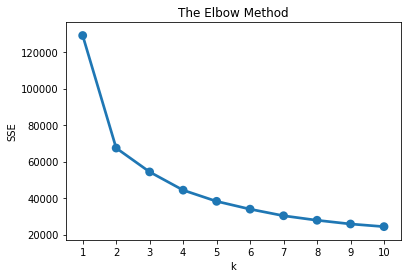

In [68]:
# Import KMeans 
from sklearn.cluster import KMeans
sse={}
# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(dataframe_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [69]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(dataframe_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

Analyze the segments

In [70]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
dataframe_rfmt_k3 = dataframe_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = dataframe_rfmt_k3.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure       
           mean      mean          mean   mean  count
Cluster                                              
0          60.0       7.3        1760.3    2.2  12550
1          34.3      20.2        4958.7   55.8  11256
2           8.0      59.0       86811.6   91.7   8460

In [71]:
cluster_map=dataframe_rfmt_k3.reset_index()
cluster_map=cluster_map[['customer_id','Cluster']]
cluster_map=dict(zip(list(cluster_map.customer_id),list(cluster_map.Cluster)))

_______________

Recency, Frequency, Monetary Prediction 
========

As previously mentioned this work was inspired by [Customer Shopping Pattern Prediction: A Recurrent Neural Network Approach ](https://ieeexplore.ieee.org/document/7849921)
 by Hojjat Salehinejad and Shahryar Rahnamayan. Together they managed to put together a short,  legible, and impactful paper that inspired me to give it a try. Journal articles such as these need to get published more often in my opinion. In the paper the authors simply used the Customer ID's for their prediction which were assumed as the Customer Loyaly Numbers (CLN); provide enough information to be able to predict the (R) Recency, (F) Frequency, and (M) Monetary values.


In [561]:
working_set=total_set[['transaction_dt','customer_id','amount','sales_price']]
working_set['total_sum']=working_set['amount']*working_set['sales_price']
working_set=working_set.drop('sales_price',axis=1)
working_set.head(3)

,transaction_dt,customer_id,amount,total_sum
0,2000-11-13,00001069,1,98
1,2000-11-13,00001069,1,89
2,2001-01-21,00001069,1,425


In [562]:
rmf_dataframe=working_set.groupby(['customer_id','transaction_dt']).sum()
rmf_dataframe['frequency']=1
rmf_dataframe['recency']=1
rmf_dataframe['monetary']=1
rmf_dataframe.head(5)

amount  total_sum  frequency  recency  monetary
customer_id transaction_dt                                                 
00001069    2000-11-13           2        187          1        1         1
            2001-01-21           3        971          1        1         1
            2001-02-03           9        922          1        1         1
            2001-02-10           2        580          1        1         1
00001113    2000-11-12           5       1231          1        1         1

In [563]:
lower_limit=total_set.transaction_dt.min()
upper_limit=total_set.transaction_dt.max()

def diff_days(start_day,end_day):  
    delta = start_day - end_day
    return delta.days

Recency

In [564]:
ident_ticker=[0]
recency=[]
frequency=[]
monetary=[]
summer=0
counter=0

In [565]:
for i in range(len(rmf_dataframe.index)):
    customer_id=rmf_dataframe.index[i][0]
    transaction_dt=rmf_dataframe.index[i][1].date()
    ident_ticker.append(customer_id)
    if ident_ticker[-2]!=customer_id:
        
        start_date=lower_limit.date()
        end_date=transaction_dt
        recency.append(diff_days(start_date,end_date))
    else:
        start_date=rmf_dataframe.index[i-1][1].date()
        end_date=transaction_dt
        recency.append(diff_days(start_date,end_date))
        
rmf_dataframe['recency']=recency

Frequency

In [566]:
for i in range(len(rmf_dataframe.index)):
    customer_id=rmf_dataframe.index[i][0]
    transaction_dt=rmf_dataframe.index[i][1].date()
    ident_ticker.append(customer_id)
    counter+=1
    if ident_ticker[-2]!=customer_id:
        counter=1
        frequency.append(counter)
    else:
        frequency.append(counter)
        
rmf_dataframe['frequency']=frequency

Monetary

In [567]:
for i in range(len(rmf_dataframe.index)):
    customer_id=rmf_dataframe.index[i][0]
    transaction_dt=rmf_dataframe.index[i][1].date()
    ident_ticker.append(customer_id)
    counter+=1
    summer+=rmf_dataframe.total_sum.values[i]
    if ident_ticker[-2]!=customer_id:
        summer=rmf_dataframe.total_sum.values[i]
        monetary.append(summer)
    else:
        monetary.append(summer)

rmf_dataframe['monetary']=monetary        

In [568]:
rmf_df_reset=rmf_dataframe.reset_index()
rmf_df_reset.tail()

,customer_id,transaction_dt,amount,total_sum,frequency,recency,monetary
119573,20002000,2000-12-16,28,3769,23,-1,82688
119574,20002000,2000-12-17,16,1896,24,-1,84584
119575,20002000,2000-12-18,27,4432,25,-1,89016
119576,20002000,2001-01-20,9,1165,26,-33,90181
119577,20002000,2001-02-05,6,216,27,-16,90397


In [569]:
#wk_set['total_sum']=wk_set['amount']*wk_set['sales_price']
rmf_df_reset['week']=[x.isocalendar()[1] for x in rmf_df_reset['transaction_dt']]
rmf_df_reset=rmf_df_reset.sort_values(by=['transaction_dt','customer_id']).reset_index(drop=True)
wk_dict_int = {44:0, 45:1, 46:2, 47:3, 48:4, \
        49:5, 50:6, 51:7, 52:8, 1:9, 2:10 , 3:11 , 4:12, 5:13 ,6:14 ,7:15,8:16,9:17}

In [570]:
rmf_df_reset['week_number'] = rmf_df_reset['week'].apply(lambda x: wk_dict_int[x])
rmf_df_reset=rmf_df_reset.drop('week',axis=1)
rmf_df_reset=rmf_df_reset.sort_values(by=['customer_id','week_number'])

In [571]:
rmf_df_reset['Cluster'] = rmf_df_reset['customer_id'].apply(lambda x: cluster_map[x])
rmf_df_reset['age_int'] = rmf_df_reset['customer_id'].apply(lambda x: age_map[x])
rmf_df_reset['pin_code_int'] = rmf_df_reset['customer_id'].apply(lambda x: pin_map[x])

In [572]:
final_data=rmf_df_reset[['transaction_dt','customer_id','week_number','amount','total_sum','frequency','recency','monetary','Cluster','age_int','pin_code_int']]
comparison=(final_data['frequency']>1)
print('Avg Frequency:',round(final_data[comparison].frequency.mean()))
print('Avg Week Number:',round(final_data[comparison].week_number.mean()))
round(final_data[comparison].week_number.value_counts())

Avg Frequency: 7
Avg Week Number: 10


16    8084
11    7827
15    6363
14    6339
13    6024
6     5981
12    5677
10    5601
5     5183
4     5135
8     5108
3     4885
9     3526
2     3463
1     3167
17    2834
7     1329
0      786
Name: week_number, dtype: int64

In [573]:
final_data.to_pickle('test_set.pkl')
#month leading up to the final week and has had at least 1 previous transaction 
comparison=((final_data['week_number']<15)) 
#comparison=((final_data['week_number']==11) | (final_data['week_number']==12) | (final_data['week_number']==13) | (final_data['week_number']==14) | (final_data['week_number']==15)) \
#& (final_data['frequency']>1) 
X_set=final_data[comparison]
#last week of data and has had at least 1 previous transaction 
comparison=((final_data['week_number']==16) | (final_data['week_number']==17) & (final_data['frequency']>1))
y_set=final_data[comparison]

In [574]:
y_id_list=sorted(list(y_set.customer_id.unique()))#unique customer ids from final week

In [575]:
X_set=X_set.loc[X_set['customer_id'].isin(y_id_list)]#have to be represented in final week

In [576]:
list_of_indexes = [np.argmin(g['transaction_dt']) for l, g in X_set.groupby('customer_id')]
X_set=X_set.ix[list_of_indexes]#keep only latest transaction from previous month purchases
X_set=X_set.sort_values(by=['customer_id','transaction_dt'])#sort by id
X_set=X_set.reset_index(drop=True)
print('number of unique customer ids:',len(set(list(X_set.customer_id))),'\nlength of the dataset:',len(X_set))
X_set.head()

number of unique customer ids: 7807 
length of the dataset: 7807


,transaction_dt,customer_id,week_number,amount,total_sum,frequency,recency,monetary,Cluster,age_int,pin_code_int
0,2000-12-16,00005241,6,6,325,1,-45,325,2,4,6
1,2000-11-11,00006668,1,6,462,1,-10,462,2,4,5
2,2000-11-04,00010801,0,1,89,1,-3,89,2,4,5
3,2000-11-14,00011235,2,3,906,1,-13,906,2,11,6
4,2000-12-03,00011914,4,7,875,1,-32,875,2,4,1


In [577]:
X_set.tail()

,transaction_dt,customer_id,week_number,amount,total_sum,frequency,recency,monetary,Cluster,age_int,pin_code_int
7802,2001-02-10,02175799,14,8,1013,1,-101,1013,2,4,6
7803,2001-02-10,02175959,14,5,219,1,-101,219,1,3,7
7804,2001-02-11,02176048,14,10,749,1,-102,749,1,1,7
7805,2001-02-11,02176079,14,21,3907,1,-102,3907,2,4,6
7806,2001-02-11,02176161,14,7,639,1,-102,639,1,3,8


In [578]:
X_set_list=sorted(list(X_set.customer_id.unique()))#get list of unique ids from those represented in the last month
y_set=y_set.loc[y_set['customer_id'].isin(X_set_list)]#return only individuals who made a purchase in the prior month

In [579]:
y_set=y_set.sort_values(by=['customer_id','transaction_dt'])
list_of_indexes = [np.argmin(g['transaction_dt']) for l, g in y_set.groupby('customer_id')]
y_set=y_set.ix[list_of_indexes]
y_set=y_set.reset_index(drop=True)
print('number of unique customer ids:',len(set(list(y_set.customer_id))),'\nlength of the dataset:',len(y_set))
y_set.head()

number of unique customer ids: 7807 
length of the dataset: 7807


,transaction_dt,customer_id,week_number,amount,total_sum,frequency,recency,monetary,Cluster,age_int,pin_code_int
0,2001-02-19,00005241,16,6,411,4,-34,6884,2,4,6
1,2001-02-22,00006668,16,2,193,10,-5,9726,2,4,5
2,2001-02-19,00010801,16,4,161,15,-7,7607,2,4,5
3,2001-02-27,00011235,17,7,1527,5,-10,4579,2,11,6
4,2001-02-28,00011914,17,4,552,5,-53,3632,2,4,1


In [580]:
y_set.tail()

,transaction_dt,customer_id,week_number,amount,total_sum,frequency,recency,monetary,Cluster,age_int,pin_code_int
7802,2001-02-28,02175799,17,2,203,2,-18,1216,2,4,6
7803,2001-02-24,02175959,16,3,263,2,-14,482,1,3,7
7804,2001-02-25,02176048,16,2,58,2,-14,807,1,1,7
7805,2001-02-25,02176079,16,21,2853,2,-14,6760,2,4,6
7806,2001-02-24,02176161,16,7,473,3,-6,1650,1,3,8


In [581]:
X_set=X_set[['customer_id','Cluster','pin_code_int','age_int','week_number','frequency','recency','monetary']]#reduce Xset
y_set=y_set[['customer_id','frequency','recency','monetary']]#reduce yset

In [582]:
X_set.to_pickle('X_set.pkl')
y_set.to_pickle('y_set.pkl')

_____________________________

In [871]:
with open('X_set.pkl', 'rb') as fp:
     X_set = pickle.load(fp)
with open('y_set.pkl', 'rb') as fp:
     y_set = pickle.load(fp)

In [872]:
X_set.head(3)

,customer_id,Cluster,pin_code_int,age_int,week_number,frequency,recency,monetary
0,00005241,2,6,4,6,1,-45,325
1,00006668,2,5,4,1,1,-10,462
2,00010801,2,5,4,0,1,-3,89


In [873]:
y_set.head(3)

,customer_id,frequency,recency,monetary
0,00005241,4,-34,6884
1,00006668,10,-5,9726
2,00010801,15,-7,7607


_________________

Model

In [874]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Input, Dense, Dropout, LSTM
from keras.layers import SimpleRNN
from keras.callbacks import EarlyStopping

from keras import regularizers
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras import optimizers

In [875]:
def return_pair(df,indexer=0):
    data=df.iloc[indexer]
    x=[]
    part1=list(map(int,list(data.iloc[0])))
    part2=list(data.iloc[1:])
    x.extend(part1)
    x.extend(part2)
    x=np.array(x)
    return x

In [876]:
X_set=np.array([return_pair(X_set,i) for i in range(0,len(X_set))])
#X_set=np.array(X_set.values)

In [877]:
X_set[0]

array([  0,   0,   0,   0,   5,   2,   4,   1,   2,   6,   4,   6,   1,
       -45, 325], dtype=int64)

In [878]:
y_set=np.array([return_pair(y_set,i) for i in range(0,len(y_set))])
#y_set=np.array(y_set.values)

In [879]:
y_set[0]

array([   0,    0,    0,    0,    5,    2,    4,    1,    4,  -34, 6884],
      dtype=int64)

In [880]:
n_orig_size=len(X_set)
n_train_percent = round(n_orig_size*.2)
print('Original size:',n_orig_size,'\n20 Percent of size:',n_train_percent)

Original size: 7807 
20 Percent of size: 1561


In [881]:
train_X=X_set[n_train_percent:,:]
train_y=y_set[n_train_percent:,:]
test_X=X_set[:n_train_percent, :]
test_y=y_set[:n_train_percent, :]

In [882]:
train_X.shape,test_X.shape

((6246, 15), (1561, 15))

In [883]:
train_y.shape,test_y.shape

((6246, 11), (1561, 11))

In [884]:
scaler_y = MinMaxScaler(feature_range=(0, 1))
train_y = scaler_y.fit_transform(train_y)
test_y = scaler_y.fit_transform(test_y)

In [885]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
rescaled_x_train = scaler_x.fit_transform(train_X)
rescaled_x_test = scaler_x.fit_transform(test_X)

In [886]:
# reshape input to be 3D [samples, timesteps, features]
train_X = rescaled_x_train.reshape((rescaled_x_train.shape[0], 1, rescaled_x_train.shape[1]))
test_X = rescaled_x_test.reshape((rescaled_x_test.shape[0], 1, rescaled_x_test.shape[1]))
print('train_X',train_X.shape,'\ntrain_y', train_y.shape,'\ntest_X', test_X.shape,'\ntest_y', test_y.shape)
 

train_X (6246, 1, 15) 
train_y (6246, 11) 
test_X (1561, 1, 15) 
test_y (1561, 11)


In [887]:
epochs = 1000
learning_rate = 0.001
model = Sequential()
model.add(SimpleRNN(15,activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(250,kernel_initializer='random_uniform', activity_regularizer=regularizers.l1(0.0001)))
model.add(Dense(11))
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_34 (SimpleRNN)    (None, 15)                465       
_________________________________________________________________
dense_78 (Dense)             (None, 250)               4000      
_________________________________________________________________
dense_79 (Dense)             (None, 11)                2761      
Total params: 7,226
Trainable params: 7,226
Non-trainable params: 0
_________________________________________________________________


In [888]:
%%capture captured

# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=120, validation_data=(test_X, test_y), validation_split=0.3, verbose=1, shuffle=True)

In [889]:
file_out=captured.stdout

In [890]:
print(file_out[-20000:])

6246/6246 [==============================] - 1s 155us/step - loss: 0.0056 - mean_absolute_error: 0.0241 - acc: 0.7443 - val_loss: 0.0062 - val_mean_absolute_error: 0.0267 - val_acc: 0.7386
Epoch 996/1000
6246/6246 [==============================] - 1s 151us/step - loss: 0.0054 - mean_absolute_error: 0.0227 - acc: 0.7510 - val_loss: 0.0065 - val_mean_absolute_error: 0.0262 - val_acc: 0.7361
Epoch 997/1000
6246/6246 [==============================] - 1s 149us/step - loss: 0.0055 - mean_absolute_error: 0.0236 - acc: 0.7531 - val_loss: 0.0066 - val_mean_absolute_error: 0.0281 - val_acc: 0.7066
Epoch 998/1000
6246/6246 [==============================] - 1s 158us/step - loss: 0.0055 - mean_absolute_error: 0.0241 - acc: 0.7426 - val_loss: 0.0064 - val_mean_absolute_error: 0.0300 - val_acc: 0.7835
Epoch 999/1000
6246/6246 [==============================] - 1s 157us/step - loss: 0.0055 - mean_absolute_error: 0.0233 - acc: 0.7456 - val_loss: 0.0062 - val_mean_absolute_error: 0.0266 - val_acc: 0.

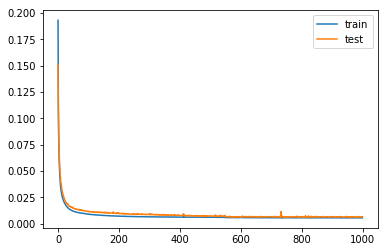

In [891]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [892]:
yhat = model.predict(test_X)
yhat.shape

(1561, 11)

In [893]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[2])
test_X.shape

(1561, 15)

In [894]:
inv_yhat = concatenate((scaler_x.inverse_transform(test_X), scaler_y.inverse_transform(yhat)),axis=1)
inv_y = concatenate((scaler_x.inverse_transform(test_X),scaler_y.inverse_transform(test_y)), axis=1)

In [895]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[0], inv_yhat[0]))
print('Test RMSE (Prediction): %.3f' % rmse)

Test RMSE (Prediction): 826.716


In [915]:
indexer=21
transformed_id=[''.join(list(map(str,list(map(int,list(scaler_x.inverse_transform(test_X)[indexer][:-7]))))))]
cluster=[scaler_x.inverse_transform(test_X)[indexer][-7]]
pin=[scaler_x.inverse_transform(test_X)[indexer][-6]]
age=[scaler_x.inverse_transform(test_X)[indexer][-5]]
prediction=list(scaler_y.inverse_transform(yhat)[:, -3:][indexer])

In [918]:
output=pd.DataFrame((transformed_id+cluster+pin+age+prediction)).T.copy()
output.columns=['ID','Cluster','Pin_code','Age_group','Recency','Freqency','Monetary']
output

,ID,Cluster,Pin_code,Age_group,Recency,Freqency,Monetary
0,00022514,1,8,4,1.25305,-42.6441,1405.36


Interpretation
------

Future ideas:
1. predicting r,f,and m values independantly
2. using multiple transactions to make a prediction
3. make dummy variables of categories then using dimensionality reduction to pass into network